<a href="https://www.kaggle.com/code/fiftythirtyfour/usa-airline-delays-in-2015?scriptVersionId=164615394" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

df = pd.read_csv('/kaggle/input/flight-delays/flights.csv')
rairline = pd.read_csv('/kaggle/input/flight-delays/airlines.csv')
df.columns = df.columns.str.lower()

## Clean
df['std_date'] = pd.to_datetime(df[['year', 'month', 'day']])
df['otp_delay15'] = np.where(df['departure_delay'] > 15, 0., 1.)

## Organize
num = [x for x in df.columns if df.dtypes[x] in ('float', 'int64')]
cat = [x for x in df.columns if df.dtypes[x] == 'object']
target = 'otp_delay15'
num.remove(target)

## Split
### Removing American and US Airways due to merger
### Choosing Skywest as my Test group

train = df.query('airline not in ["OO", "AA", "US"]') 
test = df.query('airline == "OO"') 

# Airline Volume by Flights
There was a Merger of American Airlines and US Airways in June 2015. Southwest, Delta and American Airlines have the biggest voume of flights in 2015.

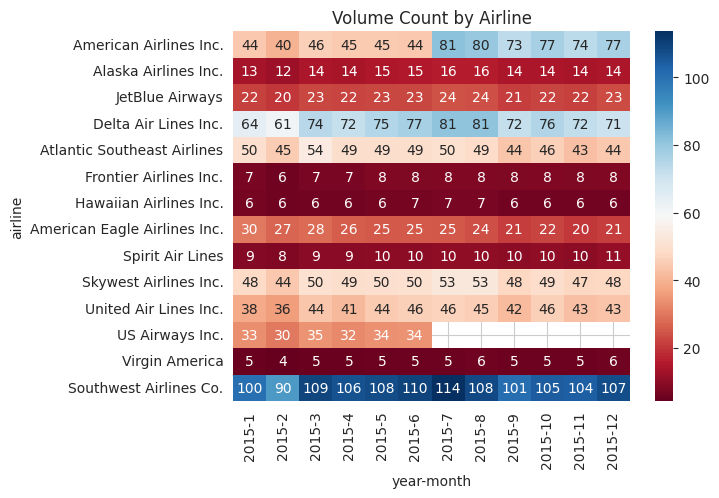

In [2]:
g = df.pivot_table('flight_number', index='airline'
              , columns=[df['year'], df['month']]
              , aggfunc='count') / 1000
g.index = g.index.map(rairline.set_index('IATA_CODE')['AIRLINE'])
sns.heatmap(g, cmap='RdBu', annot=True, fmt='.0f')

plt.title("Volume Count by Airline");

# Airline Departure On-Time Performance. 
Why it is important for an Airline to depart on-time?

Airlines makes money by having their planes in the air. In a given period, each aircraft that an airline has would fly a route. Once, that aircraft reaches its destination, it will fly another route and make money. To maximize revenue, an airline would plan as many flights as possible. This results to a tight and strict schedule. When a flight is delayed, it will directly impact the next flight, which creates ripple effect that cascades delays to the series of flights. Therefore, it is critical that every flight departs on schedule or else, they will run the risk of flight distruption and airlines would lose the opportunity of making money.

In aviation, a flight is considered on time when it has departed within 15 minutes of scheduled departure time. Beyond that, it will be considered delayed. Airlines would space out their schedule to leave room for delays but when an aircraft is super delayed, then it would either bring out their spare aircraft or swap another aircraft that arrived early from another flight. As long as they deliver their passengers to their destination, it does not matter which aircraft they use. As long as they bring those passengers from point A to point B.

In the graph below, we can observe that the lower volume flights like Hawaiian, Virgin and Alaska Airlines are almost always on time. Delta and American airlines are also on time taking into consideration that they have more flights in 2015.

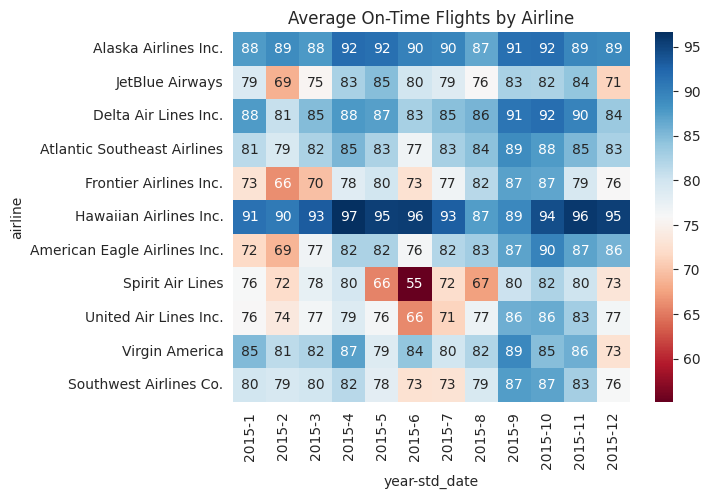

In [3]:
g = train.query('cancelled == 0 and diverted == 0')
g = g.pivot_table(target, index='airline'
             , columns=[g['year'], g['std_date'].dt.month]
             , aggfunc='mean')  * 100
g.index = g.index.map(rairline.set_index('IATA_CODE')['AIRLINE'])
sns.heatmap(g, annot=True, cmap='RdBu')
plt.title('Average On-Time Flights by Airline');